<a href="https://colab.research.google.com/github/danielwhitt/FATE/blob/main/rtofs_float_deployment_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import xarray as xr
import pandas as pd
import numpy as np


In [ ]:
#!wget https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs.20240201/rtofs_glo_2ds_f001_diag.nc

--2024-10-25 22:50:33--  https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs.20240201/rtofs_glo_2ds_f001_diag.nc
Resolving noaa-nws-rtofs-pds.s3.amazonaws.com (noaa-nws-rtofs-pds.s3.amazonaws.com)... 52.217.92.132, 52.216.185.139, 3.5.11.209, ...
Connecting to noaa-nws-rtofs-pds.s3.amazonaws.com (noaa-nws-rtofs-pds.s3.amazonaws.com)|52.217.92.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194533151 (186M) [application/x-netcdf]
Saving to: ‘rtofs_glo_2ds_f001_diag.nc’

rtofs_glo_2ds_f001_ 100%[===================>] 185.52M  27.4MB/s    in 6.9s    

2024-10-25 22:50:41 (27.0 MB/s) - ‘rtofs_glo_2ds_f001_diag.nc’ saved [194533151/194533151]



In [6]:
url_base="https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs."
start_date, end_date = ["20240807", "20240812"]
hours = np.arange(0,1,1)
# Nowcast is hourly: #np.arange(0, 25, 1)

fType="nowcast" # test nowcast (or analysis) for now; forecast later.
fSuff="_diag.nc"

if fType == "forecast":
  fPref="rtofs_glo_2ds_f"
  "rtofs_glo_2ds_n000_diag.nc"
else:
  fPref="rtofs_glo_2ds_n"


In [7]:
data_dates = pd.date_range(start=start_date, end=end_date)
for dd in data_dates:
  print("Downloading data for:\t", dd.strftime("%Y%m%d"))
  for hr in hours:
    url = url_base + dd.strftime("%Y%m%d") + "/" + fPref + str(hr).zfill(3)+ fSuff
    fName = fPref + str(hr).zfill(3)+ fSuff
    fName_save = fPref + dd.strftime("_%Y%m%d_") + str(hr).zfill(3)+ fSuff
    print(url)
    print(fName)
    print(fName_save)
    !wget $url
    !mv $fName $fName_save

https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs.20240807/rtofs_glo_2ds_n000_diag.nc
rtofs_glo_2ds_n000_diag.nc
rtofs_glo_2ds_n_20240807_000_diag.nc
--2024-10-25 23:17:35--  https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs.20240807/rtofs_glo_2ds_n000_diag.nc
Resolving noaa-nws-rtofs-pds.s3.amazonaws.com (noaa-nws-rtofs-pds.s3.amazonaws.com)... 16.15.178.30, 54.231.141.1, 3.5.8.117, ...
Connecting to noaa-nws-rtofs-pds.s3.amazonaws.com (noaa-nws-rtofs-pds.s3.amazonaws.com)|16.15.178.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194518319 (186M) [application/x-netcdf]
Saving to: ‘rtofs_glo_2ds_n000_diag.nc’

rtofs_glo_2ds_n000_ 100%[===================>] 185.51M  31.1MB/s    in 6.0s    

2024-10-25 23:17:41 (30.8 MB/s) - ‘rtofs_glo_2ds_n000_diag.nc’ saved [194518319/194518319]

https://noaa-nws-rtofs-pds.s3.amazonaws.com/rtofs.20240808/rtofs_glo_2ds_n000_diag.nc
rtofs_glo_2ds_n000_diag.nc
rtofs_glo_2ds_n_20240808_000_diag.nc
--2024-10-25 23:17:41--  https

In [8]:
!ls -alt *.nc

-rw-r--r-- 1 root root 194677749 Aug 12 06:09 rtofs_glo_2ds_n_20240812_000_diag.nc
-rw-r--r-- 1 root root 194539639 Aug 11 06:09 rtofs_glo_2ds_n_20240811_000_diag.nc
-rw-r--r-- 1 root root 194533317 Aug 10 06:09 rtofs_glo_2ds_n_20240810_000_diag.nc
-rw-r--r-- 1 root root 194526703 Aug  9 06:08 rtofs_glo_2ds_n_20240809_000_diag.nc
-rw-r--r-- 1 root root 194479472 Aug  8 06:09 rtofs_glo_2ds_n_20240808_000_diag.nc
-rw-r--r-- 1 root root 194518319 Aug  7 06:09 rtofs_glo_2ds_n_20240807_000_diag.nc


In [9]:
dsF=xr.open_mfdataset(fPref+"*"+fSuff)
dsF


<xarray.Dataset> Size: 2GB
Dimensions:                           (MT: 6, Y: 3298, X: 4500)
Coordinates:
  * MT                                (MT) datetime64[ns] 48B 2024-08-06 ... ...
    Date                              (MT) float64 48B dask.array<chunksize=(1,), meta=np.ndarray>
  * Y                                 (Y) int32 13kB 1 2 3 4 ... 3296 3297 3298
  * X                                 (X) int32 18kB 1 2 3 4 ... 4498 4499 4500
    Latitude                          (Y, X) float32 59MB dask.array<chunksize=(825, 1125), meta=np.ndarray>
    Longitude                         (Y, X) float32 59MB dask.array<chunksize=(825, 1125), meta=np.ndarray>
Data variables:
    ssh                               (MT, Y, X) float32 356MB dask.array<chunksize=(1, 825, 1125), meta=np.ndarray>
    u_barotropic_velocity             (MT, Y, X) float32 356MB dask.array<chunksize=(1, 825, 1125), meta=np.ndarray>
    v_barotropic_velocity             (MT, Y, X) float32 356MB dask.array<chunksize=(1, 825, 1125), meta=np.ndarray>
    surface_boundary_layer_thickness  (MT, Y, X) float32 356MB dask.array<chunksize=(1, 825, 1125), meta=np.ndarray>
    mixed_layer_thickness             (MT, Y, X) float32 356MB dask.array<chunksize=(1, 825, 1125), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.0
    title:        HYCOM ATLb2.00
    institution:  National Centers for Environmental Prediction
    source:       HYCOM archive file
    experiment:   92.8
    history:      archv2ncdf2d

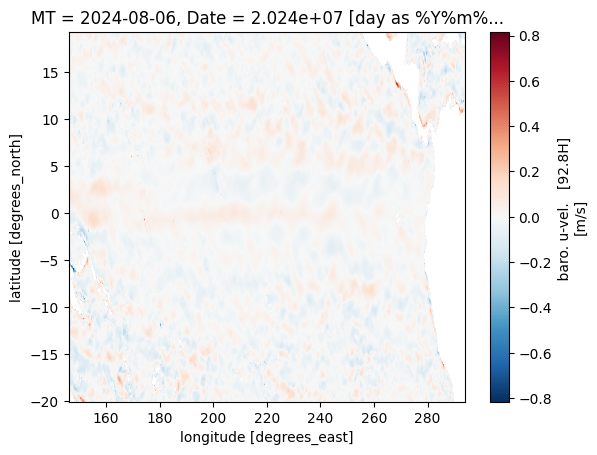

In [11]:
ds_cut=dsF.sel(X=slice(900,2750), Y=slice(1250, 1750))

# sanity check
ds_cut.isel(MT=0).u_barotropic_velocity.plot(x='Longitude', y='Latitude')
